<a href="https://colab.research.google.com/github/Luis1Corado/Luis1Corado/blob/main/ANALISIS_DATOS_CLORO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "/content/Clean_data.csv"
clean_data = pd.read_csv(path)

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      328 non-null    datetime64[ns]
 1   pH         328 non-null    float64       
 2   Cl_libre   326 non-null    float64       
 3   Alarm      327 non-null    float64       
 4   dia        328 non-null    object        
 5   Semana     328 non-null    int64         
 6   Mes        328 non-null    object        
 7   Hora       328 non-null    object        
 8   Fecha_dia  328 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 23.2+ KB


In [4]:
clean_data.drop(columns ="Unnamed: 0",inplace = True)

In [3]:
import datetime as dt
clean_data.Fecha = pd.to_datetime(clean_data.Fecha)

clean_data["Hora"] = clean_data.Fecha.dt.strftime("%-H")
clean_data["Fecha_dia"] = clean_data.Fecha.dt.strftime("%d/%m")

In [6]:
clean_data.head()

,Fecha,pH,Cl_libre,Alarm,dia,Semana,Mes,Hora,Fecha_dia
0,2023-08-02 16:00:00,7.65,0.91,0.0,Mie,31,August,16,02/08
1,2023-08-02 17:00:00,7.60,0.40,0.0,Mie,31,August,17,02/08
2,2023-08-02 18:00:00,7.55,0.48,0.0,Mie,31,August,18,02/08
3,2023-08-03 08:00:00,7.57,0.84,0.0,Jue,31,August,8,03/08
4,2023-08-03 09:00:00,7.59,0.35,0.0,Jue,31,August,9,03/08


In [7]:
def group(column):
  return clean_data.groupby(column).mean()["Cl_libre"]

In [8]:
def histplot(column):
  sns.histplot(data = clean_data, x = column)

def boxplot(column):
  sns.boxplot(data = clean_data, x = column)

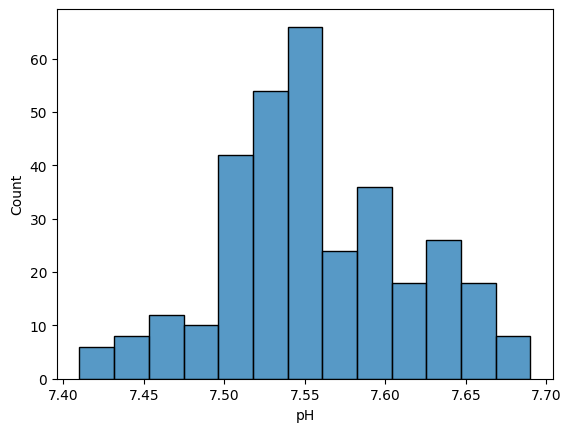

In [ ]:
histplot("pH")

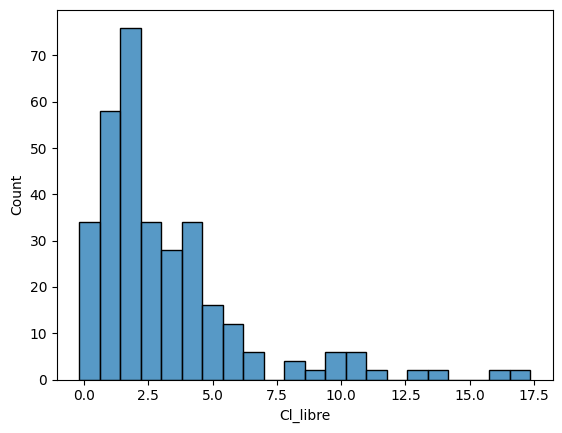

In [ ]:
histplot("Cl_libre")

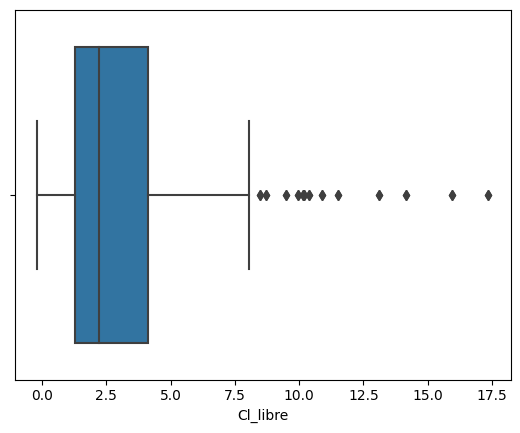

In [ ]:
boxplot("Cl_libre")

In [ ]:
Media_por_semana = group('Semana')
Media_por_dia = group('Fecha_dia')
Media_por_dia_semana = group('dia')
Media_por_hora = group('Hora')


<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-7

In [ ]:
Semana_31 = clean_data[clean_data['Semana'] == 31]
Semana_32 = clean_data[clean_data['Semana'] == 32]
Semana_33 = clean_data[clean_data['Semana'] == 33]

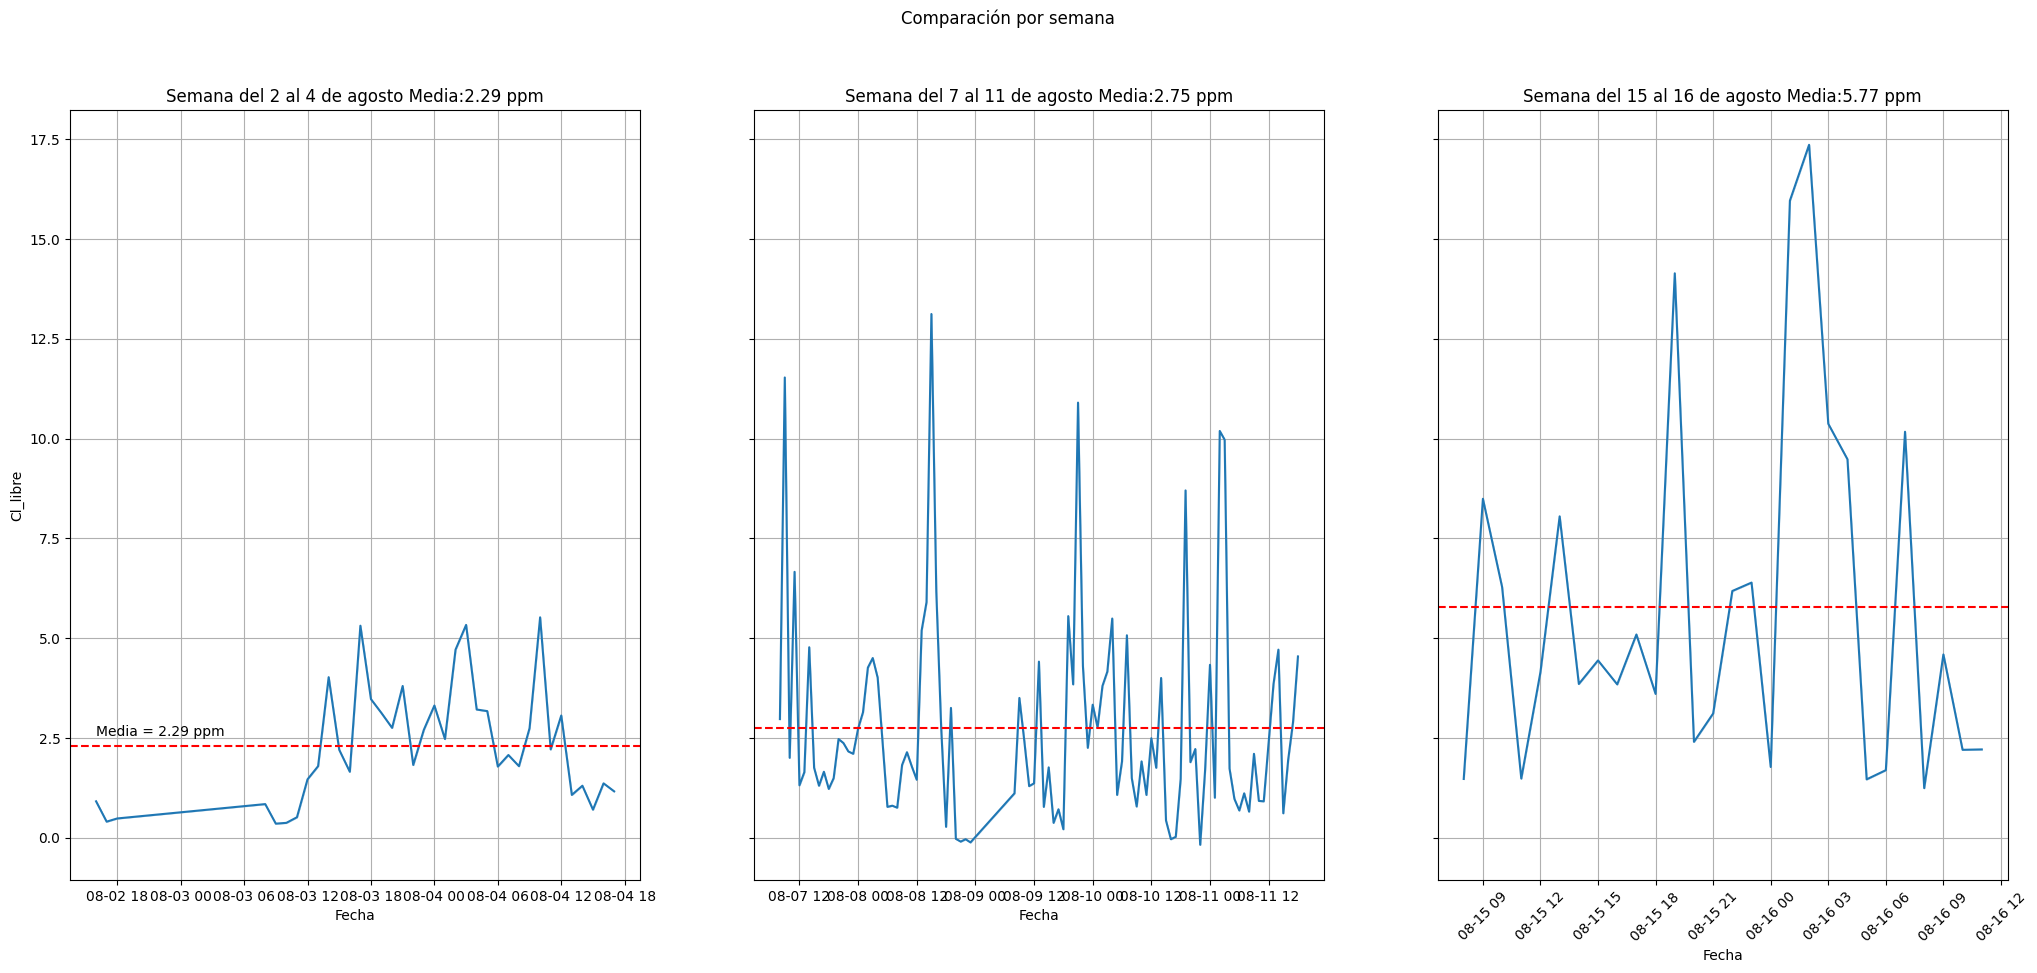

In [ ]:

fig, axs = plt.subplots(1, 3, figsize = (25,10), sharey = True)
fig.suptitle("Comparación por semana")
sns.lineplot(ax=axs[0], data = Semana_31, x = 'Fecha', y = 'Cl_libre' )
sns.lineplot(ax=axs[1], data = Semana_32, x = 'Fecha', y = 'Cl_libre' )
sns.lineplot(ax=axs[2], data = Semana_33, x = 'Fecha', y = 'Cl_libre' )

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

mean_w1 = Semana_31.Cl_libre.mean()
mean_w2 = Semana_32.Cl_libre.mean()
mean_w3 = Semana_33.Cl_libre.mean()
##axs[0].set_xticks(ticks = Semana_31.Fecha , labels = Semana_31.Fecha_dia ,rotation=45,fontsize=8)
plt.xticks(rotation = 45)
axs[0].axhline(mean_w1 , c ='red', ls = '--')
axs[1].axhline(mean_w2 , c ='red', ls = '--')
axs[2].axhline(mean_w3 , c ='red', ls = '--')

axs[0].text(x = Semana_31.Fecha[0], y = mean_w1 +0.25 ,s = f'Media = {mean_w1:.2f} ppm')

axs[0].set_title(f'Semana del 2 al 4 de agosto Media:{mean_w1:.2f} ppm')
axs[1].set_title(f'Semana del 7 al 11 de agosto Media:{mean_w2:.2f} ppm')
axs[2].set_title(f'Semana del 15 al 16 de agosto Media:{mean_w3:.2f} ppm')

#axs[2].text(x = Semana_33.Fecha[0], y = mean_w3 +0.25 ,s = f'Media = {mean_w3:.2f}')
fig.savefig("Comparacion_por_semana.png")


In [ ]:
Media_por_semana = group('Semana')
Media_por_dia = group('Fecha_dia')
Media_por_dia_semana = group('dia')
Media_por_hora = group('Hora')



<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-721590dbe71a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return clean_data.groupby(column).mean()["Cl_libre"]
<ipython-input-31-7

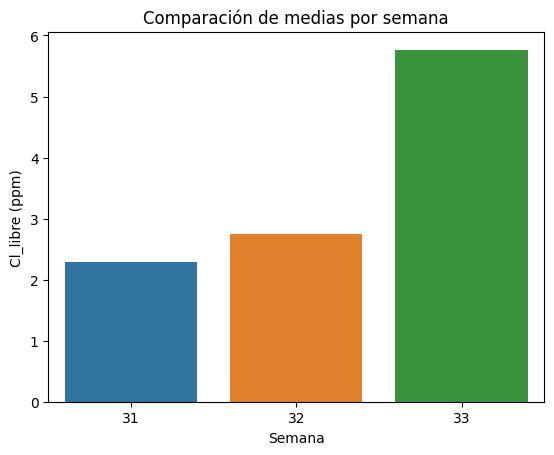

In [ ]:
media_semanal = sns.barplot(x= Media_por_semana.index, y = Media_por_semana.values )
plt.ylabel('Cl_libre (ppm)')
plt.title('Comparación de medias por semana')
fig = media_semanal.get_figure()
fig.savefig("Media_semanal.png")

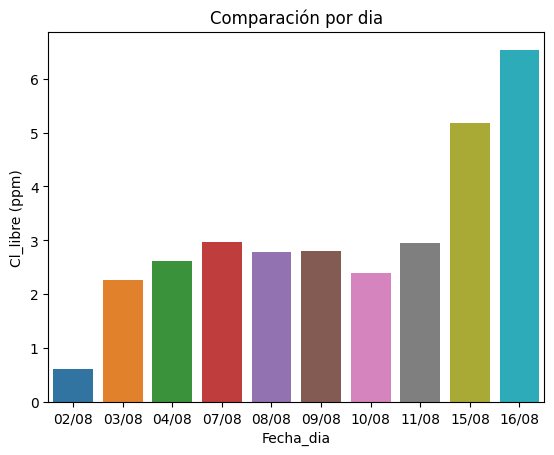

In [ ]:
media_diaria = sns.barplot(x= Media_por_dia.index, y = Media_por_dia.values )
plt.ylabel('Cl_libre (ppm)')
plt.title('Comparación por dia')
fig = media_diaria.get_figure()
fig.savefig("Media_diaria.png")

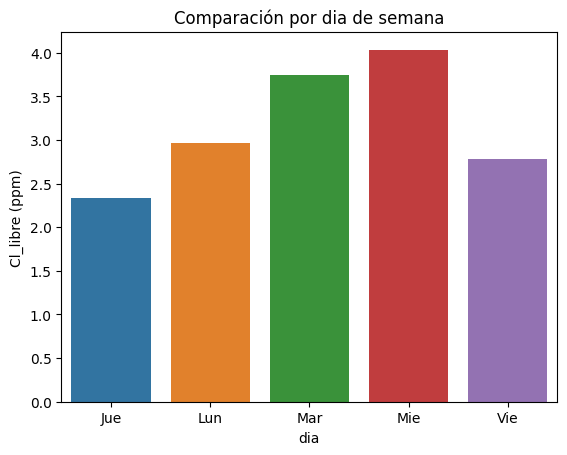

In [ ]:
media_weekday = sns.barplot(x= Media_por_dia_semana.index, y = Media_por_dia_semana.values )
plt.ylabel('Cl_libre (ppm)')
plt.title('Comparación por dia de semana')
fig = media_weekday.get_figure()
fig.savefig("Media_por_dia.png")

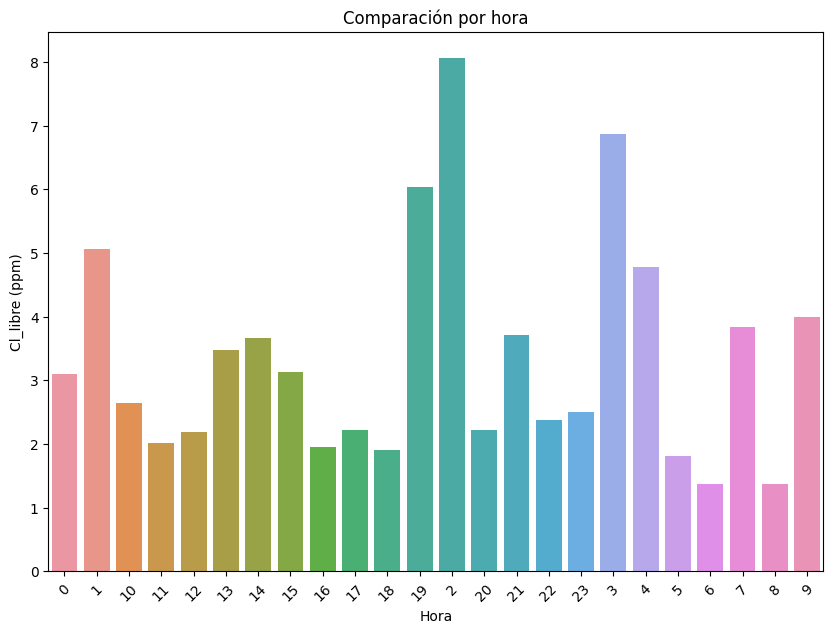

In [ ]:
plt.figure(figsize = (10,7))
media_hora = sns.barplot(x= Media_por_hora.index, y = Media_por_hora.values )
plt.ylabel('Cl_libre (ppm)')
plt.title('Comparación por hora')
plt.xticks(rotation = 45)
fig = media_hora.get_figure()
fig.savefig("Media_por_hora.png")

In [9]:
clean_data.Hora = clean_data.Hora.astype(int)

In [10]:
Vespertina = clean_data[((clean_data.Hora > 0) & (clean_data.Hora <= 7)) | ((clean_data.Hora > 19) & (clean_data.Hora <= 23))]
Matutina = clean_data[((clean_data.Hora > 7) & (clean_data.Hora <= 19))]

In [11]:
Vespertina.Cl_libre.mean()

3.7947457627118646

In [12]:
Matutina.Cl_libre.mean()

2.792525252525253

In [13]:
clean_data['Jornada'] = clean_data.Hora.apply(lambda x: 'Matutina' if x > 7 & x <= 19 else 'Vespertina')

In [14]:
clean_data

,Fecha,pH,Cl_libre,Alarm,dia,Semana,Mes,Hora,Fecha_dia,Jornada
0,2023-08-02 16:00:00,7.65,0.91,0.00,Mie,31,August,16,02/08,Matutina
1,2023-08-02 17:00:00,7.60,0.40,0.00,Mie,31,August,17,02/08,Matutina
2,2023-08-02 18:00:00,7.55,0.48,0.00,Mie,31,August,18,02/08,Matutina
3,2023-08-03 08:00:00,7.57,0.84,0.00,Jue,31,August,8,03/08,Matutina
4,2023-08-03 09:00:00,7.59,0.35,0.00,Jue,31,August,9,03/08,Matutina
...,...,...,...,...,...,...,...,...,...,...
323,2023-08-16 07:00:00,7.58,10.17,10.17,Mie,33,August,7,16/08,Vespertina
324,2023-08-16 08:00:00,7.54,1.24,1.24,Mie,33,August,8,16/08,Matutina
325,2023-08-16 09:00:00,7.55,4.59,4.59,Mie,33,August,9,16/08,Matutina
326,2023-08-16 10:00:00,7.54,2.20,2.20,Mie,33,August,10,16/08,Matutina


In [15]:
clean_data.to_csv("/content/Clean_data2.csv")